# **2. Multivariate Linear Regression**
Load relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


Load dataset

In [ ]:
# Raw URL for the CSV file
url = 'https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(url)

df.head(5)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


Investigate dataset

In [ ]:
df.info() # Looks like there are some null values; let's check them out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [ ]:
# So it seems like the experience column is made up of texts and not numbers.
# Let's create a function that would change take the texts and convert them into
# numbers.

def text_to_numbers(text):
  if text == 'zero':
    return 0
  if text == 'one':
    return 1
  elif text == 'two':
    return 2
  elif text == 'three':
    return 3
  elif text == 'four':
    return 4
  elif text == 'five':
    return 5
  elif text == 'six':
    return 6
  elif text == 'seven':
    return 7
  else:
    return None

# let's apply this function to the df['experience'] columns
df['experience'] = df['experience'].apply(text_to_numbers)
df['experience']

,experience
0,NaN
1,NaN
2,5.0
3,2.0
4,7.0
5,3.0
6,NaN
7,NaN


In [ ]:
# Replace the NaNs with the medians using median imputation
df['experience'] = df['experience'].fillna(df['experience'].median())
df.experience = np.floor(df.experience)
df.experience

,experience
0,4.0
1,4.0
2,5.0
3,2.0
4,7.0
5,3.0
6,4.0
7,4.0


In [ ]:
# rename a few columns...
df.rename(columns={'test_score(out of 10)': 'test_score'}, inplace=True)
df.rename(columns={'interview_score(out of 10)': 'interview_score'}, inplace=True)
df.rename(columns={'salary($)': 'salary'}, inplace=True)

df.columns

Index(['experience', 'test_score', 'interview_score', 'salary'], dtype='object')

In [ ]:
# Do median imputation for test score
df.test_score = df.test_score.fillna(df.test_score.median())
df.test_score = np.floor(df.test_score)

In [ ]:
# Recheck all the columns
df.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      float64
 1   test_score       8 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 384.0 bytes


In [ ]:
# Create a regression object
model = LinearRegression()

In [ ]:
# Create the X and Y columns
X = df[['experience', 'test_score', 'interview_score']]
y = df['salary']

In [ ]:
# Fit the linear model
model.fit(X, y)

model.coef_, model.intercept_

(array([3042.94478528,  216.76891616, 2319.01840491]), 30478.527607361906)

In [ ]:
# Create a prediction
predicted = model.predict(X)

# check score
model.score(X, y)

0.06204755153330077

In [ ]:
# Attach predicted to orignal dataframe
df['predicted'] = predicted

df['residuals'] = df.salary - df.predicted
df

,experience,test_score,interview_score,salary,predicted,residuals
0,4.0,8.0,9,50000,65255.623722,-15255.623722
1,4.0,8.0,6,45000,58298.568507,-13298.568507
2,5.0,6.0,7,60000,63226.993865,-3226.993865
3,2.0,10.0,10,65000,61922.290389,3077.709611
4,7.0,9.0,6,70000,67644.171779,2355.828221
5,3.0,7.0,10,62000,64314.928425,-2314.928425
6,4.0,8.0,7,72000,60617.586912,11382.413088
7,4.0,7.0,8,80000,62719.836401,17280.163599


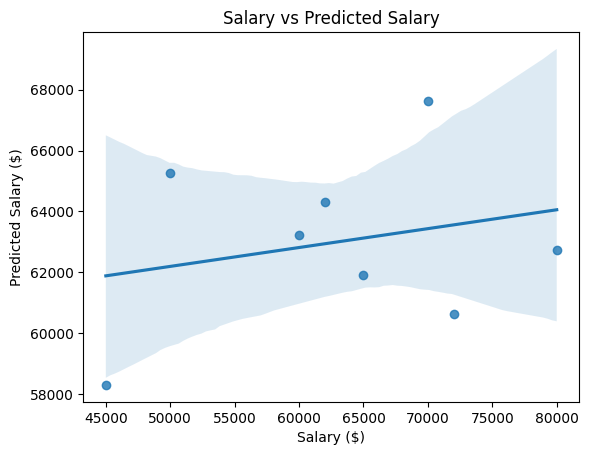

In [ ]:
# Lets plot salary against predicted
sns.regplot(x='salary', y='predicted', data=df)
plt.xlabel('Salary ($)')
plt.ylabel('Predicted Salary ($)')
plt.title('Salary vs Predicted Salary')
plt.show()

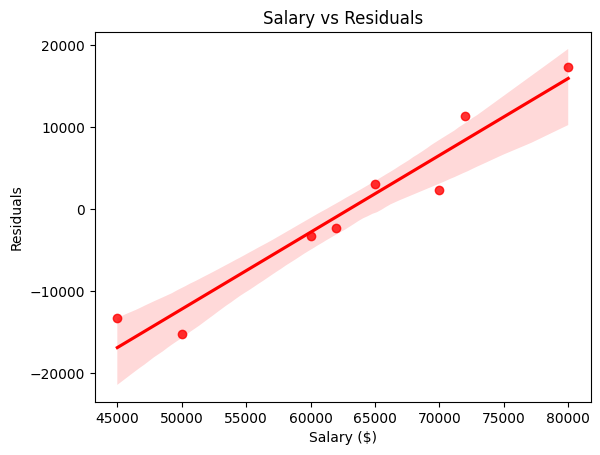

In [ ]:
# Let's plot salary against residuals
sns.regplot(x='salary', y='residuals', data=df, color = 'red')
plt.xlabel('Salary ($)')
plt.ylabel('Residuals')
plt.title('Salary vs Residuals')
plt.show()

# High degree of correlation between Salary and Residuals indicating model misspecification